In [1]:
# import os
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

In [2]:
# file_dir = "/egr/research-aidd/menghan1/AnchorDrug/ActiveLearning_one_cellline/logfile/drug100"
# file_list = [f for f in os.listdir(file_dir)]
# cell_list = list(set([c.split('_')[1] for c in file_list]))
# print(cell_list)
# query_list = list(set([q.split('_')[2] for q in file_list]))
# print(query_list)

In [3]:
# time_list = np.sort(list(set([q.split('_')[7] for q in file_list if q.split('_')[6]=='20240205'])))
# print(time_list)

In [4]:
# def metrics_from_txt(fname):
#     paragraph = []
#     with open(fname) as f:
#         for sentence in f.readlines():
#             # print(sentence)
#             if sentence.startswith('Round'):
#                 # print(sentence[:-1])
#                 if sentence == 'Round 0:\n':
#                     paragraph.append(sentence[:-2])
#                 else:
#                     paragraph.append(sentence[:-2])
#             if sentence.startswith('testing '):
#                 # print(sentence[:-1])
#                 paragraph.append(sentence[:-1])
#     # print(paragraph)
#     data_dict = {}
#     for n in range(len(paragraph)//3):
#         roundnum = paragraph[3*n].split()[1]
#         acc = paragraph[3*n+1].split()
#         f1 = paragraph[3*n+2].split()
#         if int(roundnum) not in data_dict:
#             data_dict[int(roundnum)] = {acc[1]:[float(acc[2])], f1[1]:[float(f1[2])]}
#         elif int(roundnum) in data_dict:
#             data_dict[int(roundnum)][acc[1]].append(float(acc[2]))
#             data_dict[int(roundnum)][f1[1]].append(float(f1[2]))
#     for n in range(21):
#         data_dict[n]['accuracy'] = np.mean(data_dict[n]['accuracy'])
#         data_dict[n]['F1'] = np.mean(data_dict[n]['F1'])
#     df = pd.DataFrame.from_dict(data_dict).T
#     # print(df)
#     return df
        

In [5]:
# for cell in cell_list:
#     f_c = [f for f in file_list if cell in f]
#     # print(f_c)
#     fig, ax = plt.subplots(1,2, figsize=(10,4))
#     for query in query_list:
#         f_qc = [f for f in f_c if query in f]
#         if len(f_qc)!=1:
#             print('wrong')
#             continue
#         f_qc = f_qc[0]
#         df = metrics_from_txt(f'{file_dir}/{f_qc}')
#         x = df.index.to_list()
#         acc = df.accuracy.to_list()
#         f1 = df.F1.to_list()
#         ax[0].plot(x, acc, label=query)
#         ax[1].plot(x, f1, label=query)
#     plt.legend(bbox_to_anchor=(1.1, 1.05))
#     ax[0].set_title(f'Cell line {cell}: Accuracy')
#     ax[1].set_title(f'Cell line {cell}: F1-score')
#     fig.tight_layout()  # otherwise the right y-label is slightly clipped
#     plt.show()
    

In [6]:
# fig, ax = plt.subplots(2,3, figsize=(15,8))
# font=14
# n = 0
# for cell in cell_list:
#     ax[0][n].set_ylim(0.45,0.78)
#     ax[1][n].set_ylim(0.37,0.55)
#     f_c = [f for f in file_list if cell in f]
#     # print(f_c)
#     print(n)
#     for query in query_list:
#         f_qc = [f for f in f_c if query in f]
#         if len(f_qc)!=1:
#             print('wrong')
#             continue
#         f_qc = f_qc[0]
#         df = metrics_from_txt(f'{file_dir}/{f_qc}')
#         x = [x*5 for x in df.index.to_list()]
#         acc = df.accuracy.to_list()
#         f1 = df.F1.to_list()
#         ax[0][n].set_title(cell, size=font)
#         ax[0][n].plot(x, acc, label=query)
#         ax[1][n].plot(x, f1, label=query)
#     n += 1
# ax[0][0].set_ylabel('Accuracy', size=font)
# ax[1][0].set_ylabel('F1-score', size=font)
# ax[1][1].set_xlabel('Number of Finetunning Samples', size=font)
# plt.legend(bbox_to_anchor=(1.0, 0.6))
#     # ax[0].set_title(f'Cell line {cell}: Accuracy')
#     # ax[1].set_title(f'Cell line {cell}: F1-score')
# fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.show()

# New data

In [7]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

## MCF7

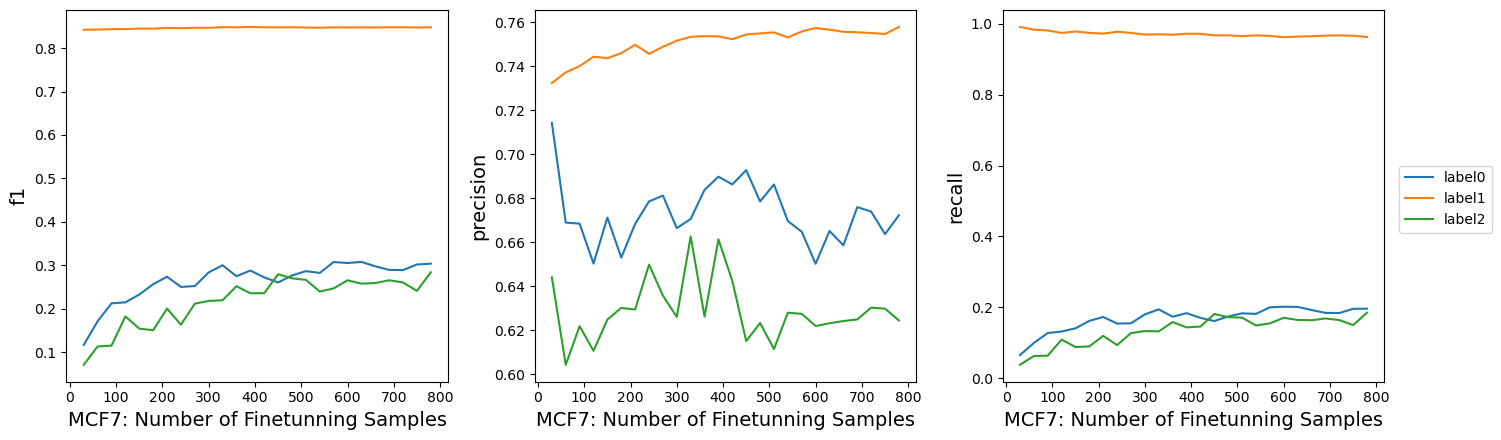

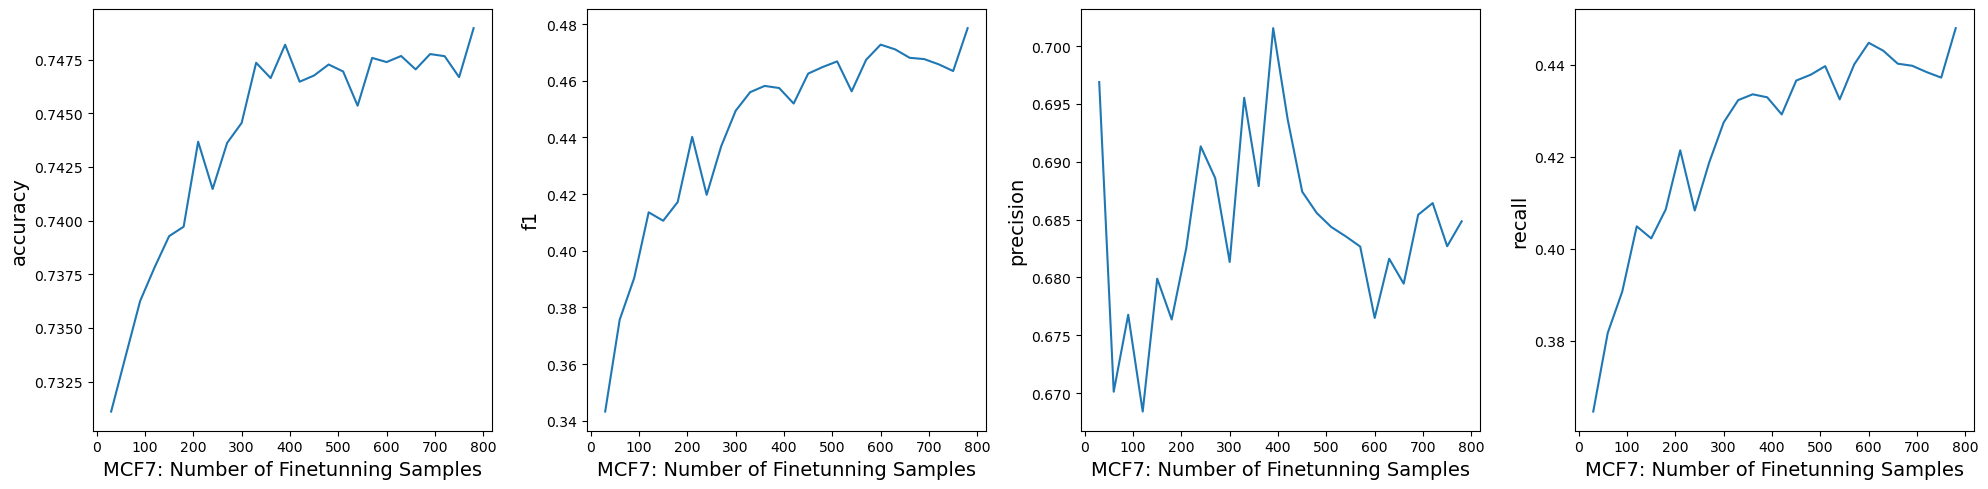

In [8]:
round_num = 27
font = 14
f1 = np.zeros((3,round_num))
precision = np.zeros((3,round_num))
recall = np.zeros((3,round_num))
accuracy = np.zeros(round_num)
for n in [0,1,2]:
    pred_data = f'/egr/research-aidd/menghan1/AnchorDrug/ActiveLearning_one_cellline/preds/LINCS_MCF7_RandomSampling_30_0_810_20240703_162811__{n}.csv'
    data = pd.read_csv(pred_data).T.to_numpy()
    # print(data.shape)
    # for i in range(1,28):
    f1 += np.array([f1_score(data[0], data[i],average=None) for i in range(1,round_num+1)]).T
    precision += np.array([precision_score(data[0], data[i],average=None) for i in range(1,round_num+1)]).T
    recall += np.array([recall_score(data[0], data[i],average=None) for i in range(1,round_num+1)]).T
    accuracy += np.array([accuracy_score(data[0], data[i]) for i in range(1,round_num+1)])
    # print(f1.shape, precision.shape, recall.shape, accuracy.shape)
    
fig, ax = plt.subplots(1,3, figsize=(15,4.5))
x = [x*30 for x in range(round_num)]
[ax[0].plot(x[1:], f1[i][1:]/3, label=f'label{i}') for i in range(3)]
[ax[1].plot(x[1:], precision[i][1:]/3, label=f'label{i}') for i in range(3)]
[ax[2].plot(x[1:], recall[i][1:]/3, label=f'label{i}') for i in range(3)]
ax[0].set_ylabel('f1', size=font)
ax[1].set_ylabel('precision', size=font)
ax[2].set_ylabel('recall', size=font)
[ax[i].set_xlabel('MCF7: Number of Finetunning Samples', size=font) for i in range(3)]
plt.legend(bbox_to_anchor=(1.3, 0.6))
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

fig, ax = plt.subplots(1,4, figsize=(20,5))
ax[0].plot(x[1:], accuracy[1:]/3, label='accuracy')
ax[0].set_ylabel('accuracy', size=font)
ax[1].plot(x[1:], np.mean(f1, axis=0)[1:]/3, label='f1')
ax[1].set_ylabel('f1', size=font)
ax[2].plot(x[1:], np.mean(precision, axis=0)[1:]/3, label='precision')
ax[2].set_ylabel('precision', size=font)
ax[3].plot(x[1:], np.mean(recall, axis=0)[1:]/3, label='recall')
ax[3].set_ylabel('recall', size=font)

[ax[i].set_xlabel('MCF7: Number of Finetunning Samples', size=font) for i in range(4)]
# plt.legend(bbox_to_anchor=(1.0, 0.6))
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

x_mcf7, f1_mcf7 = x[1:], np.mean(f1, axis=0)[1:]/3

## A549

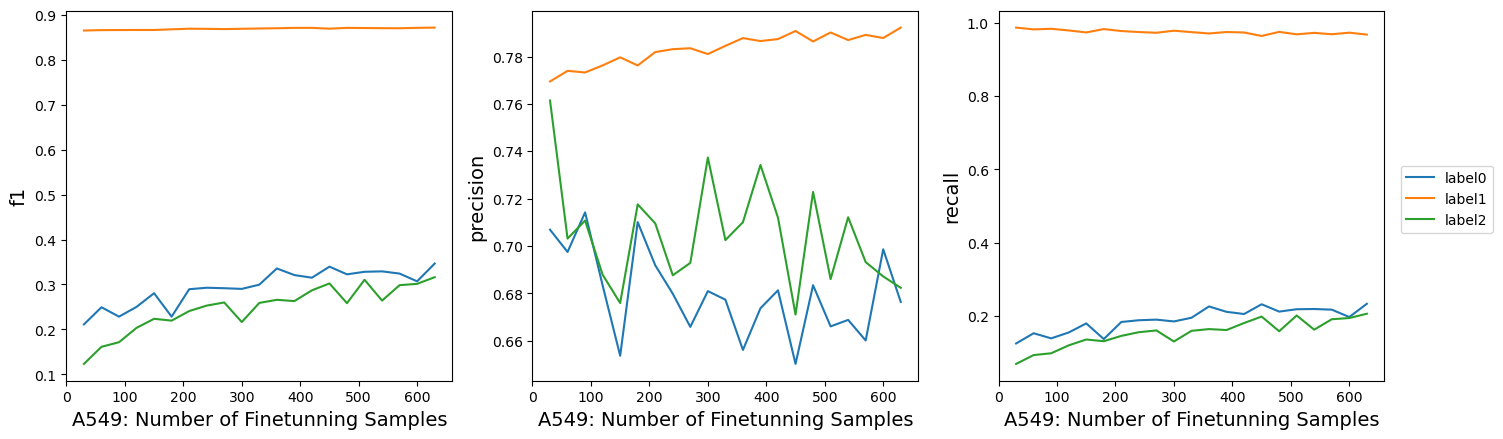

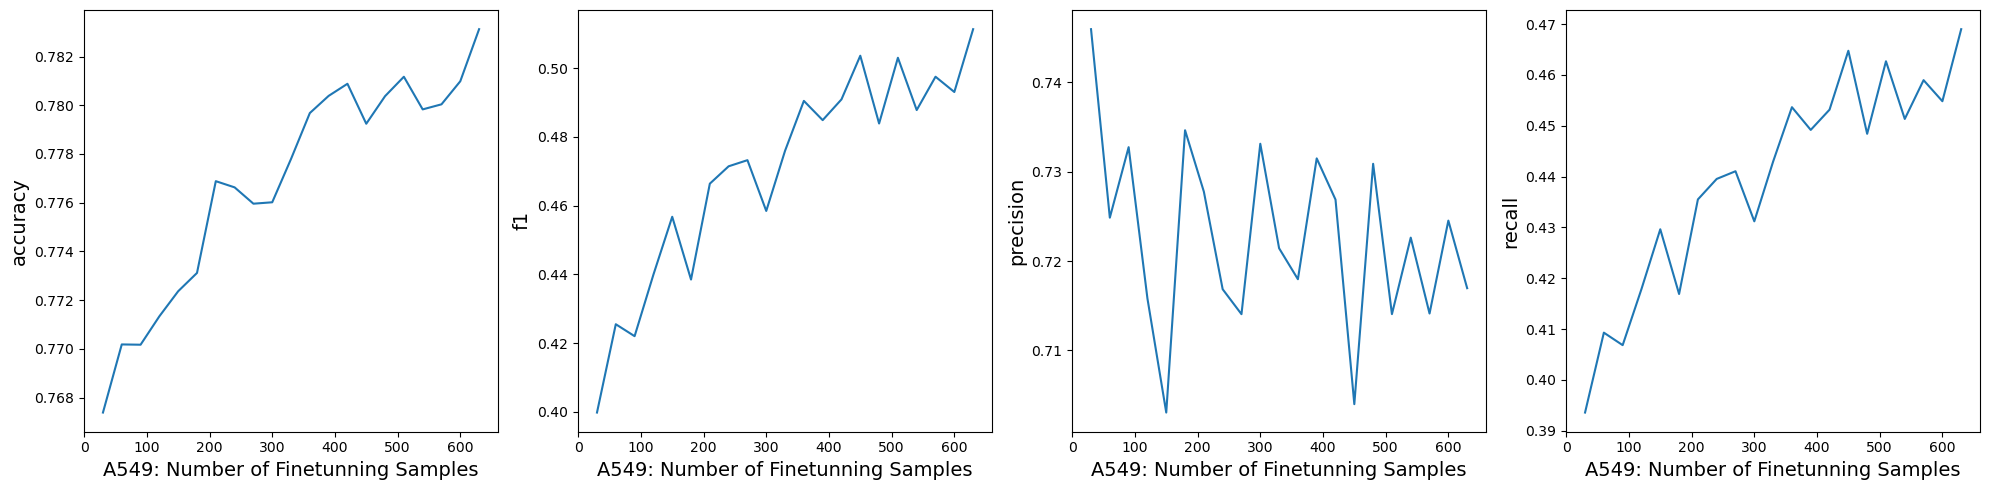

In [9]:
round_num = 22
font = 14
f1 = np.zeros((3,round_num))
precision = np.zeros((3,round_num))
recall = np.zeros((3,round_num))
accuracy = np.zeros(round_num)
for n in [0,1,2]:
    pred_data = f'/egr/research-aidd/menghan1/AnchorDrug/ActiveLearning_one_cellline/preds/LINCS_A549_RandomSampling_30_0_642_20240703_162809__{n}.csv'
    data = pd.read_csv(pred_data).T.to_numpy()
    # print(data.shape)
    # for i in range(1,28):
    f1 += np.array([f1_score(data[0], data[i],average=None) for i in range(1,round_num+1)]).T
    precision += np.array([precision_score(data[0], data[i],average=None) for i in range(1,round_num+1)]).T
    recall += np.array([recall_score(data[0], data[i],average=None) for i in range(1,round_num+1)]).T
    accuracy += np.array([accuracy_score(data[0], data[i]) for i in range(1,round_num+1)])
    # print(f1.shape, precision.shape, recall.shape, accuracy.shape)
    
fig, ax = plt.subplots(1,3, figsize=(15,4.5))
x = [x*30 for x in range(round_num)]
[ax[0].plot(x[1:], f1[i][1:]/3, label=f'label{i}') for i in range(3)]
[ax[1].plot(x[1:], precision[i][1:]/3, label=f'label{i}') for i in range(3)]
[ax[2].plot(x[1:], recall[i][1:]/3, label=f'label{i}') for i in range(3)]
ax[0].set_ylabel('f1', size=font)
ax[1].set_ylabel('precision', size=font)
ax[2].set_ylabel('recall', size=font)
[ax[i].set_xlabel('A549: Number of Finetunning Samples', size=font) for i in range(3)]
plt.legend(bbox_to_anchor=(1.3, 0.6))
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

fig, ax = plt.subplots(1,4, figsize=(20,5))
ax[0].plot(x[1:], accuracy[1:]/3, label='accuracy')
ax[0].set_ylabel('accuracy', size=font)
ax[1].plot(x[1:], np.mean(f1, axis=0)[1:]/3, label='f1')
ax[1].set_ylabel('f1', size=font)
ax[2].plot(x[1:], np.mean(precision, axis=0)[1:]/3, label='precision')
ax[2].set_ylabel('precision', size=font)
ax[3].plot(x[1:], np.mean(recall, axis=0)[1:]/3, label='recall')
ax[3].set_ylabel('recall', size=font)

[ax[i].set_xlabel('A549: Number of Finetunning Samples', size=font) for i in range(4)]
# plt.legend(bbox_to_anchor=(1.0, 0.6))
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

x_a549, f1_a549 = x[1:], np.mean(f1, axis=0)[1:]/3

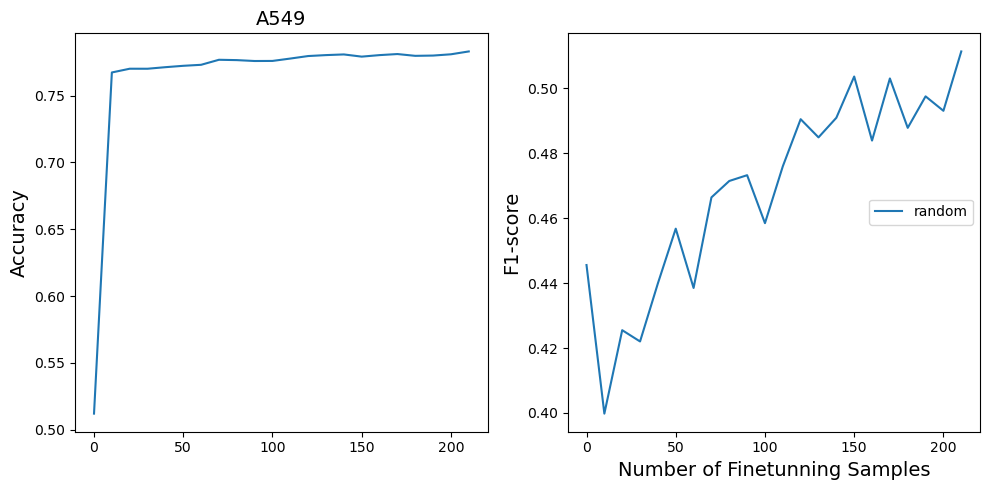

In [10]:
### double check with logfile
def metrics_from_txt(fname):
    paragraph = []
    with open(fname) as f:
        for sentence in f.readlines():
            # print(sentence)
            if sentence.startswith('Round'):
                # print(sentence[:-1])
                if sentence == 'Round 0:\n':
                    paragraph.append(sentence[:-2])
                else:
                    paragraph.append(sentence[:-2])
            elif sentence.startswith('testing '):
                # print(sentence[:-1])
                paragraph.append(sentence[:-1])
            elif sentence.startswith('!!!!!total used time:'):
                time = float(sentence.split(' ')[-1])
    # print(paragraph)
    data_dict = {}
    for n in range(len(paragraph)//3):
        roundnum = paragraph[3*n].split()[1]
        acc = paragraph[3*n+1].split()
        f1 = paragraph[3*n+2].split()
        if int(roundnum) not in data_dict:
            data_dict[int(roundnum)] = {acc[1]:[float(acc[2])], f1[1]:[float(f1[2])]}
        elif int(roundnum) in data_dict:
            data_dict[int(roundnum)][acc[1]].append(float(acc[2]))
            data_dict[int(roundnum)][f1[1]].append(float(f1[2]))
    for n in range(round_num):
        data_dict[n]['accuracy'] = np.mean(data_dict[n]['accuracy'])
        data_dict[n]['F1'] = np.mean(data_dict[n]['F1'])
    df = pd.DataFrame.from_dict(data_dict).T
    # print(df)
    return df, time

fig, ax = plt.subplots(1,2, figsize=(10,5))
df, time = metrics_from_txt('/egr/research-aidd/menghan1/AnchorDrug/ActiveLearning_one_cellline/logfile/LINCS_A549_RandomSampling_30_0_642_20240703_162809_.txt')
x = [x*10 for x in df.index.to_list()]
acc = df.accuracy.to_list()
f1 = df.F1.to_list()
ax[0].set_title('A549', size=font)
ax[0].plot(x, acc, label='random')
ax[1].plot(x, f1, label='random')
ax[0].set_ylabel('Accuracy', size=font)
ax[1].set_ylabel('F1-score', size=font)
ax[1].set_xlabel('Number of Finetunning Samples', size=font)
plt.legend(bbox_to_anchor=(1.0, 0.6))
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## PC3

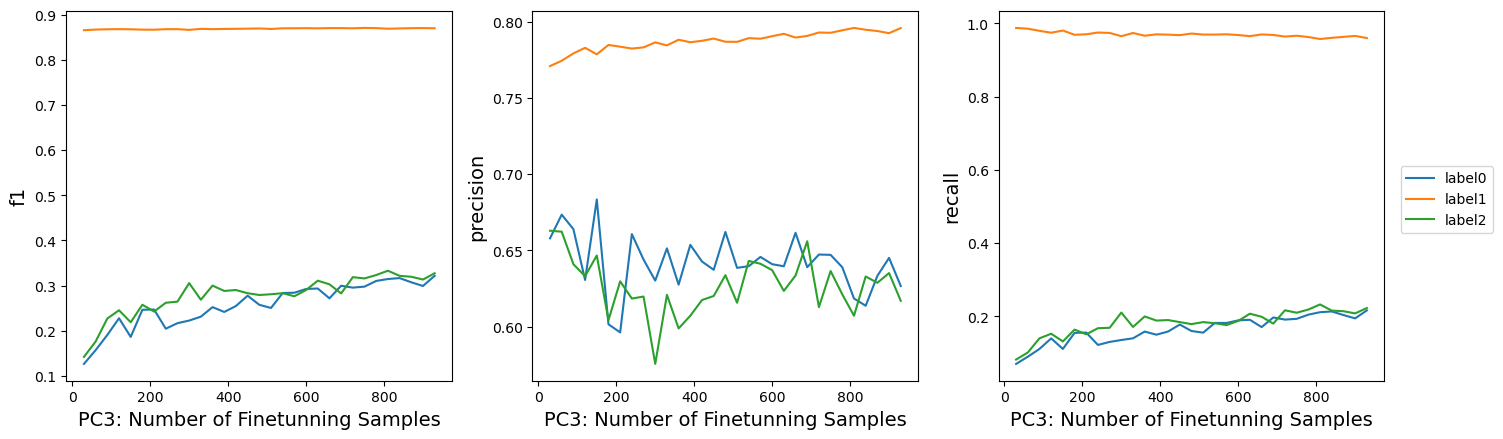

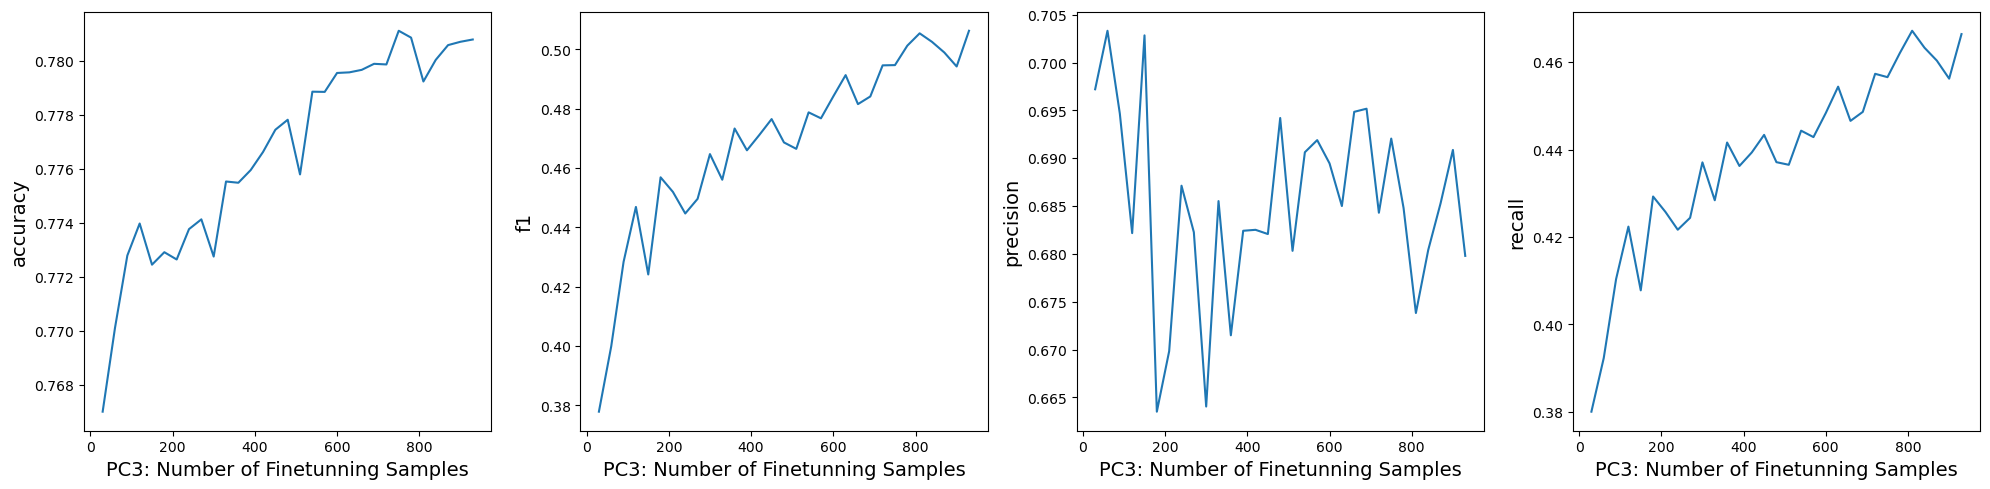

In [11]:
round_num = 32
font = 14
f1 = np.zeros((3,round_num))
precision = np.zeros((3,round_num))
recall = np.zeros((3,round_num))
accuracy = np.zeros(round_num)
for n in [0,1,2]:
    pred_data = f'/egr/research-aidd/menghan1/AnchorDrug/ActiveLearning_one_cellline/preds/LINCS_PC3_RandomSampling_30_0_957_20240703_162810__{n}.csv'
    data = pd.read_csv(pred_data).T.to_numpy()
    # print(data.shape)
    # for i in range(1,28):
    f1 += np.array([f1_score(data[0], data[i],average=None) for i in range(1,round_num+1)]).T
    precision += np.array([precision_score(data[0], data[i],average=None) for i in range(1,round_num+1)]).T
    recall += np.array([recall_score(data[0], data[i],average=None) for i in range(1,round_num+1)]).T
    accuracy += np.array([accuracy_score(data[0], data[i]) for i in range(1,round_num+1)])
    # print(f1.shape, precision.shape, recall.shape, accuracy.shape)
    
fig, ax = plt.subplots(1,3, figsize=(15,4.5))
x = [x*30 for x in range(round_num)]
[ax[0].plot(x[1:], f1[i][1:]/3, label=f'label{i}') for i in range(3)]
[ax[1].plot(x[1:], precision[i][1:]/3, label=f'label{i}') for i in range(3)]
[ax[2].plot(x[1:], recall[i][1:]/3, label=f'label{i}') for i in range(3)]
ax[0].set_ylabel('f1', size=font)
ax[1].set_ylabel('precision', size=font)
ax[2].set_ylabel('recall', size=font)
[ax[i].set_xlabel('PC3: Number of Finetunning Samples', size=font) for i in range(3)]
plt.legend(bbox_to_anchor=(1.3, 0.6))
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

fig, ax = plt.subplots(1,4, figsize=(20,5))
ax[0].plot(x[1:], accuracy[1:]/3, label='accuracy')
ax[0].set_ylabel('accuracy', size=font)
ax[1].plot(x[1:], np.mean(f1, axis=0)[1:]/3, label='f1')
ax[1].set_ylabel('f1', size=font)
ax[2].plot(x[1:], np.mean(precision, axis=0)[1:]/3, label='precision')
ax[2].set_ylabel('precision', size=font)
ax[3].plot(x[1:], np.mean(recall, axis=0)[1:]/3, label='recall')
ax[3].set_ylabel('recall', size=font)

[ax[i].set_xlabel('PC3: Number of Finetunning Samples', size=font) for i in range(4)]
# plt.legend(bbox_to_anchor=(1.0, 0.6))
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

x_pc3, f1_pc3 = x[1:], np.mean(f1, axis=0)[1:]/3

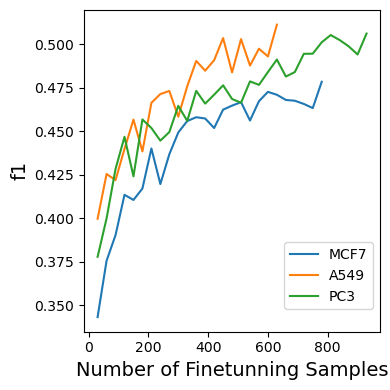

In [14]:
fig, ax = plt.subplots(figsize=(4,4))
ax.plot(x_mcf7, f1_mcf7, label='MCF7')
ax.plot(x_a549, f1_a549, label='A549')
ax.plot(x_pc3, f1_pc3, label='PC3')
ax.set_ylabel('f1', size=font)
ax.set_xlabel('Number of Finetunning Samples', size=font)
plt.legend(bbox_to_anchor=(1.0, 0.3))
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()